![Intern](capgeminLogo.jpg)

# <span style="color: rgba(255, 128, 0, 0.8)">**Interns project for world crisis analysis**</span>


In this notebook we are going to present you the work we achieved here in the **AD Center** of **Capgemini** ! We have been throught different tools, softwares and work methods in order to develop a usefull and powerfull tool to manipulate **BIG DATA**. <br/> <br/> *But what exactly is the idea ?* <br/><br/> → We wanted to find a way to analyse the crisis evolution in each country of the world with respect to officials datas taken from well-known websites <br/> <br/> To reach this goal, we used **3** different main tools : <br/><br/>
1. Spark and its pyspark librairy as we wanted to use Python
2. Docker and its containers 
3. Jenkins and its pipeline 
<br/> <br/>
Let's take a look at what we are manipulating now !

###  <span style="color: rgba(255, 128, 120, 0.8)">With which kind of data we are playing with ?</span>


Let's start with the begining and see what are the **3 data bases** we are using for our analysis : 

1. A Json Object taking is data directly from the ***Food and Agriculture Organization*** database.In this file we can find informations about the agricultural production of each country in the world from **1960** to **2018**

2. A CSV file that can be read with Excel and which takes is data directly from the famous ***WorldBank*** website. In this file we can find the amount of population for each country in the world from **1960** to **2018**

3. A DB file which is literally a SQL data base that can be read with DB Browser and which takes is data from ***WorldBank*** website too. In this file we can find the GDP/PIB and a growth indicator for each country in the world from **1960** to **2018** 

![Intern](databases.png)


###  <span style="color: rgba(255, 128, 80, 0.8)">Benefits of using Spark librairies and architecture</span>


Spark is a powerfull and open-source framework in order to manage big data. As we use Python, we used the library pyspark to play with the data we found on the internet. But let's see what's bring us to use Spark <br/><br/> 
Here we gathered all the advantages of **Spark** in one scheme : 
<br/><br/> 
![Intern](sparkAdvantages.png)
<br/><br/> 
These advantages are due to a special architecture : 
<br/><br/> 
![Intern](sparkArchitecture.png)
<br/><br/> 
Furthermore, the librairies of Spark allowed us to create the most import and usefull things we needed to start to play with the project: the **SparkSession** : 
![Intern](sparkContext.jpg)

###  <span style="color: rgba(255, 128, 120, 0.8)">TDD Method</span>

Another method which has been really important for our project is The TDD method. It has been really usefull in order to developp the test of our different functions

![Intern](tdd.png)

###  <span style="color: rgba(255, 128, 120, 0.8)">Jupyter: great notework for developer and data scientist</span>

<img src="jupylogo.png" alt="Kitten"
	title="A cute kitten" width="150" height="100" />

Jupyter is a powerful web Application used as an IDE. This tool is very usefull for data analysis projects. Comparing to other IDEs, it offers the following benefits:

- Interactive results : with cells, jupyter allows to test each part of the code instead of the whole code. Then we can visualize datas and see the results without having to leave the environment or to run the entire program.

- Supports more than 40 differents programming languages

- Trying various perspectives : with cells, we can code differents programs/fonctions independently. Then it moves easier to investigate other perspective without making a new file.

- Better gestion of teamword

- Web Application

###  <span style="color: rgba(255, 128, 120, 0.8)">Project workspace and environnements in local</span>

This is a representation of how we configured the local workspace of the project. There are **three common environnements** that we tried to run together : 
1. <span style="color: rgba(0, 0, 200, 0.8)">**Docker**</span>
2. <span style="color: rgba(250, 127, 1, 0.8)">**Jupyter - Spark**</span>
3. <span style="color: rgba(0, 0, 0, 0.8)">**Local Disc**</span>
<br/> <br/>
![Intern](Jupyterenv.png)

###  <span style="color: rgba(255, 128, 120, 0.8)">Continuous Integration using Docker, Jenkins and Pyspark</span>

This is the most interesting part of the project. Indeed, we tried to **apply the Continuous Integration on how we were managing the project in local**. We finally found a apropriate architecture : 

![Intern](env.png)

###  <span style="color: rgba(255, 128, 120, 0.8)">Now let's start to play with the data bases !</span>

We are going here to show you the direct applications of our functions and results throught various schemes and graphics.
However we are still going to pass throught some lines of code...as it is important to grab the idea of the entire process !

###  <span style="color: rgba(255, 0, 0, 0.8)">Importing the requirements</span>

Here some import to allow us to work with pyspark and plotly, which last one is a powerfull library to plot graphics and schemes

In [3]:
from pyspark import SparkContext
from pyspark import SQLContext
from operator import add
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Other imports ! But here, it is in order to call our different classes in which we have all our functions defined 

In [4]:

import sys
sys.path.append('../FAO')
from FAO_production import FAO_production
sys.path.append('../WorldGDP')
from SQLiteNotebook import Spark_GDP
sys.path.append('../employment')
from Unemployment import Employment

In [5]:
spark = SparkSession.builder.appName("Crisis_analyse").getOrCreate()

###  <span style="color: rgba(255, 0, 0, 0.8)">Playing with the JSON data base</span>
<br/>
Here doing the connexion with the data base

In [7]:
datapth = "../data2/FAO+database.json"
sqlCtx = SQLContext(spark.sparkContext)
data = sqlCtx.read.json(datapth, multiLine=True)

Just a little instance of the first class

In [8]:
FAO = FAO_production(data, spark)

Applying sum function to gradualy see the raise of the **world production throught the years** :

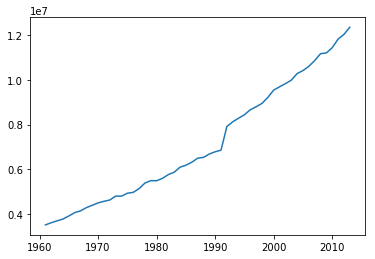

In [9]:
FAO.plot_production_sum()

<br/>
Another graph but here to see the production with rescpect to different geographic areas :

In [13]:
FAO.plot_zones_production

<bound method FAO_production.plot_zones_production of <FAO_production.FAO_production object at 0x7fd0485237b8>>

This time it's a little bit more funny, you can see a worldmap with a <span style="color: rgba(0, 0, 255, 0.8)">**color indicator**</span> for each country. This color indicator represents the level of food production of the country within the year submited in the function's call :

In [11]:
FAO.plot_production_world(2008)

###  <span style="color: rgba(255, 0, 0, 0.8)">Playing with the SQLite data base</span>
<br/>
Here creating the instance of the database

In [ ]:
import sqlite3

In [ ]:
datapath = "../data2/world-gdp.db"
sqlitedata = sqlite3.connect(datapath)

In [ ]:
GDP = Spark_GDP(sqlitedata, spark)

Playing here with the database

In [ ]:
pandaDF = GDP.createGDPPandaDF()

In [ ]:
sparkDF = GDP.createSparkDFfromPandaDF(pandaDF)

In [ ]:
sparkDF_filtered = GDP.replaceNullValuesTo0fromSparkDF(sparkDF, "all", ["gdp", "growth"])

Choosing the **range of years** here 

In [ ]:
year_frame = [2009,2012]

In [ ]:
CountryGDP_panda_DF = GDP.PandaDFOfGDPperCountryfromSparkDF(sparkDF_filtered, year_frame)

In [ ]:
GDP.plotLinesGrowthwithPandaDF(CountryGDP_panda_DF,year_frame)

###  <span style="color: rgba(255, 0, 0, 0.8)">Playing with CSV database to calculate unemployment</span>
<br/>
Here creating the instance of the database

In [ ]:
datapath = '../data2/Book2.csv'
data = spark.read.format('csv').options(header='true', inferSchema='true', delimiter=';').load(datapath)

In [ ]:
Unemployment = Employment(data, spark)

In [ ]:
geo_zone = {'United States':'US', 'European Union': 'Europe', \
            'Singapore':'Asian Tigers', 'Korea, Rep.':'Asian Tigers' , 'Hong Kong':'Asian Tigers', \
             'Brazil':'BRICS', 'Russian Federation':'BRICS', 'India':'BRICS', 'South Africa':'BRICS'}

In [ ]:
years_frame = [2004,2014]

In [ ]:
Frame_studied = Unemployment.extract_info(years_frame,['United States', 'European Union', 'China', 'Japan', \
                            'Singapore', 'Korea, Rep.', 'Hong Kong' \
                            'Brazil', 'Russian Federation', 'India', 'South Africa'])

In [ ]:
Frame_studied_clased = Unemployment.add_groups(Frame_studied, geo_zone)

In [ ]:
dataframeSpark = Unemployment.groups_data(Frame_studied_clased,years_frame)

In [ ]:
Unemployment.plot_unemployment(dataframeSpark, years_frame)